## First Steps to Data Science

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot  as plt

In [2]:
penguins = sns.load_dataset('penguins')
data = penguins.copy()
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Dataset Information**

There are seven variables in our current data set. Among these variables, species, island and sex are categorical, and the remaining variables are numeric variables. The dataset contains information about penguins. This information in order;

> **Species:** Types of penguins in the dataset

> **Island:** Islands of penguins in the dataset

> **Bill_length_mm:** Bill lengths in millimeters of penguins in the data set

> **Bill_depth_mm:** Bill depth in millimeters of penguins in the data set

> **Flipper_length:** Flipper lengths in millimeters of penguins in the data set

> **Body_mass_g:** Weights in grams of penguins in the data set

> **Sex:** The genders of the penguins in the data set

 
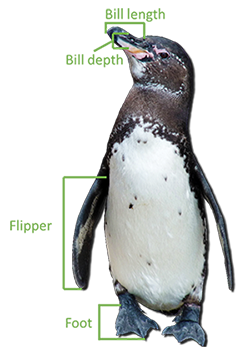

In [4]:
data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


**Correlation**

```data.corr()```

> **Correlation:** In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related. 

> This code helps us to examine the correlation relationships of variables with each other. When the table is examined, we can interpret that the negative values ​​are inversely related to each other, and that the positive values ​​are linearly related to each other. Looking at the table again, the highest and strongest linear relationship between body mass and flipper length is 0.87.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


```data.describe().T```

> This line of code allows us to easily access simple statistical data related to our dataset.

In [6]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

``` data['species'].value_counts() ``` <br>
> We access the information in the species variable in our dataset.

In [7]:
adelie = data.species == 'Adelie'
adelie = data[adelie]
adelie.species.value_counts()

Adelie    152
Name: species, dtype: int64

In [8]:
gentoo = data.species == 'Gentoo'
gentoo = data[gentoo]
gentoo.species.value_counts()

Gentoo    124
Name: species, dtype: int64

In [9]:
chinstrap = data.species == 'Chinstrap'
chinstrap = data[chinstrap]
chinstrap.species.value_counts()

Chinstrap    68
Name: species, dtype: int64

> The above operations allow us to separate species variables.

```adelie = data.species == 'Adelie'```
> This code examines the dataset and returns true if the type variable is adelie, otherwise false.

```adelie = data[adelie]``` 
> This code takes our adelie variable as index and allows us to separate the adelie specie.

In [10]:
adelie.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

```adelie.isnull().sum()```

> This code provides information about missing value.

In [12]:
adelie.dropna(inplace = True)
adelie.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

``adelie.dropna(inplace = True)``

> This code deletes the missing values ​​and saves the changes also in the main dataset

In [13]:
gentoo.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  5
dtype: int64

In [14]:
print('Mean: ', gentoo['bill_length_mm'].mean())
gentoo['bill_length_mm'].fillna(gentoo['bill_length_mm'].mean())

Mean:  47.504878048780476


220    46.100000
221    50.000000
222    48.700000
223    50.000000
224    47.600000
         ...    
339    47.504878
340    46.800000
341    50.400000
342    45.200000
343    49.900000
Name: bill_length_mm, Length: 124, dtype: float64

`` gentoo['bill_length_mm'].fillna(gentoo['bill_length_mm'].mean())``

> This code replaces the missing value with the mean of the specified variable.

In [15]:
gentoo['flipper_length_mm'].fillna(0)

220    211.0
221    230.0
222    210.0
223    218.0
224    215.0
       ...  
339      0.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 124, dtype: float64

`` gentoo['flipper_length_mm'].fillna(0) ``

> This code assigns 0 instead of missing value.

## Data Visualization

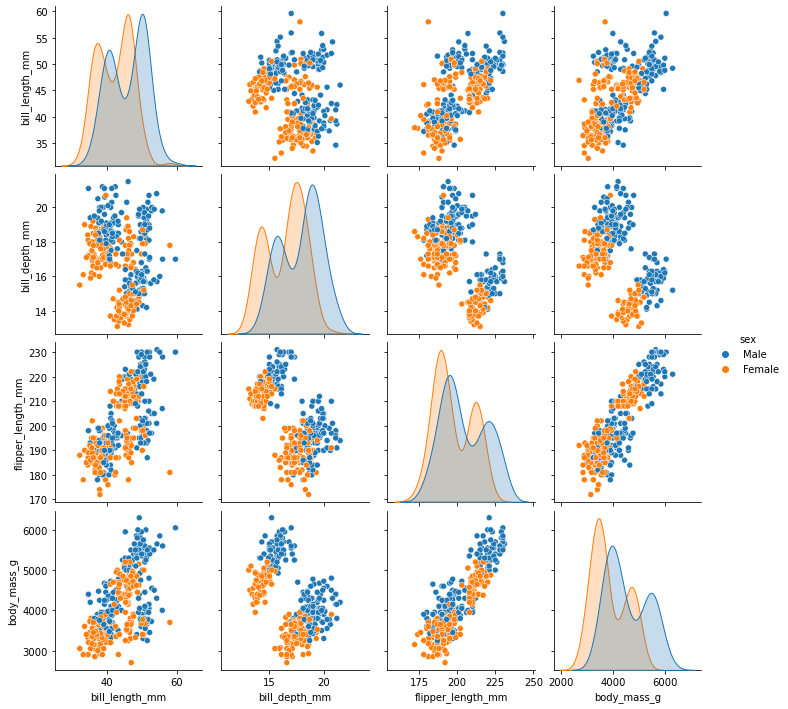

In [16]:
# Scatter Plot
sns.pairplot(data, hue="sex");

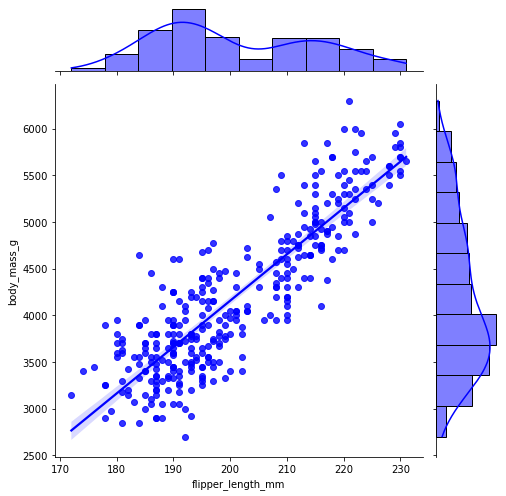

In [17]:
sns.jointplot(x="flipper_length_mm",
              y="body_mass_g",
              data=data,
              kind="reg",
              color="blue",
              height=7);

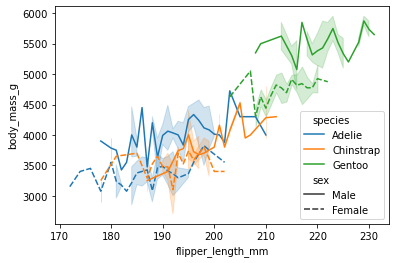

In [18]:
sns.lineplot(x="flipper_length_mm",
             y="body_mass_g",
             hue="species",
             style="sex",
             data=data);

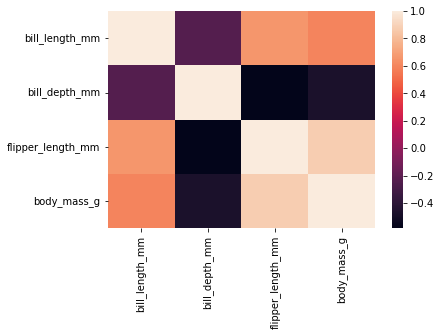

In [19]:
sns.heatmap(data.corr());

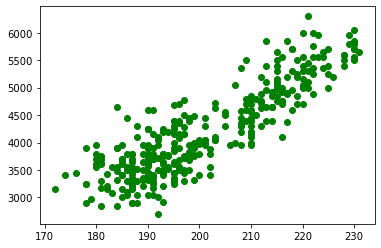

In [20]:
plt.scatter(data["flipper_length_mm"],data["body_mass_g"],color = "green");

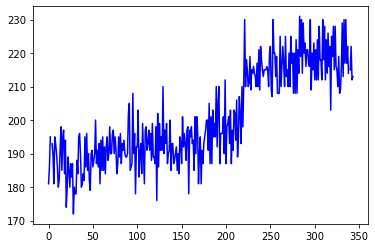

In [21]:
plt.plot(data["flipper_length_mm"],color = "blue");